In [1]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import matplotlib.image as image
from PIL import Image, ImageOps
from numpy import asarray

In [2]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#Color conversion BGR 2 RGB
    image.flags.writeable = False #Image is unwriteable
    results = model.process(image)#Make prediction
    image.flags.writeable = True#Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#color conversion RGB 2 BGR
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness = 1, circle_radius =1),
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness = 1, circle_radius =1)
                             )
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness = 2, circle_radius =2)
                             )
    #Draw hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness = 2, circle_radius =2)
                             )
    #Draw hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness = 2, circle_radius =2)
                             )

In [5]:
cap = cv2.VideoCapture(0)
#Set mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #Break loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
results.face_landmarks.landmark

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
draw_styled_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Vẽ điểm trên ảnh bất kỳ

In [6]:
test_img = Image.open("frame1.jpg")
to_array_test_img = asarray(test_img)
to_array_test_img.shape

FileNotFoundError: [Errno 2] No such file or directory: 'frame1.jpg'

In [ ]:
plt.imshow(cv2.rotate(to_array_test_img, cv2.ROTATE_180))

In [ ]:
# test_img = test_img.resize((640, 480))

In [ ]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    a, b = mediapipe_detection(to_array_test_img, holistic)
    draw_styled_landmarks(a, b)

In [ ]:
draw_styled_landmarks(a, b)

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))

# End

In [5]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if \
        results.face_landmarks else np.zeros(468*3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if \
        results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if \
        results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if \
        results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
results_test = extract_keypoints(results)

In [ ]:
results_test.shape

# setup folder for collection

In [6]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_60FPS')

# Actions that we try to detect# n_inputs = 30, input = 30 frames
actions = np.array(['wait_','hello_R', 'hello_L',  'thanks_R', 'thanks_L', 'No_',
                   'sorry_L', 'sorry_R', 'name_'])

# Sixty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# start_folder = 30

In [9]:
# for action in actions: 
# #     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     try:
#         os.makedirs(os.path.join(DATA_PATH, action + '_image'))
#     except:
#         pass
#     for sequence in range(no_sequences):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

# Collect keypoint for training

In [37]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             count = 0
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()
                
#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)
# #                 print(results)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
# #                 img_path = os.path.join(DATA_PATH, action + '_image', 'frame%d.jpg' % count)
#                 count+=1
# #                 cv2.imwrite(img_path, image)
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
# #                 NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)
                
#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [9]:
label_map

{'wait_': 0,
 'hello_R': 1,
 'hello_L': 2,
 'thanks_R': 3,
 'thanks_L': 4,
 'No_': 5,
 'sorry_L': 6,
 'sorry_R': 7,
 'name_': 8}

In [10]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [11]:
X = np.array(sequences)

In [12]:
y = to_categorical(labels).astype(int)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [18]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0,

# 7. Build and Train LSTM Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from keras.optimizers import SGD

In [15]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [16]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [17]:
sgd = SGD(learning_rate=0.0005)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
17/17 [==============================] - 5s 51ms/step - loss: 2.1862 - categorical_accuracy: 0.1520
Epoch 2/2000
17/17 [==============================] - 1s 51ms/step - loss: 1.9683 - categorical_accuracy: 0.2943
Epoch 3/2000
17/17 [==============================] - 1s 52ms/step - loss: 1.8881 - categorical_accuracy: 0.3411
Epoch 4/2000
17/17 [==============================] - 1s 55ms/step - loss: 1.3429 - categorical_accuracy: 0.5536
Epoch 5/2000
17/17 [==============================] - 1s 52ms/step - loss: 1.4085 - categorical_accuracy: 0.4581
Epoch 6/2000
17/17 [==============================] - 1s 54ms/step - loss: 1.3619 - categorical_accuracy: 0.4522
Epoch 7/2000
17/17 [==============================] - 1s 52ms/step - loss: 1.2003 - categorical_accuracy: 0.4873
Epoch 8/2000
17/17 [==============================] - 1s 53ms/step - loss: 0.9550 - categorical_accuracy: 0.6413
Epoch 9/2000
17/17 [==============================] - 1s 55ms/step - loss: 1.0194 - categorical_

KeyboardInterrupt: 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [21]:
res = model.predict(X_test)

1/1 [==============================] - 1s 897ms/step


In [22]:
actions[np.argmax(res[2])]

'wait_'

In [23]:
actions[np.argmax(y_test[2])]

'wait_'

In [28]:
res

array([[2.58651300e-04, 4.73550099e-05, 4.16165858e-06, 9.92465973e-01,
        1.83513257e-04, 5.94493067e-05, 4.66035726e-03, 2.32056947e-03],
       [2.50924175e-04, 4.41699012e-05, 4.10406665e-06, 9.92836773e-01,
        1.87514423e-04, 6.01840256e-05, 4.21870919e-03, 2.39754561e-03],
       [3.44425425e-05, 1.95884586e-05, 8.51776171e-03, 3.73090779e-06,
        1.13509251e-02, 9.80035067e-01, 3.76107732e-06, 3.46874658e-05],
       [2.22343078e-04, 3.41068153e-05, 3.61112552e-06, 9.93902981e-01,
        1.87151498e-04, 6.01770480e-05, 3.34980292e-03, 2.23980658e-03],
       [2.22786039e-04, 3.98743323e-05, 4.72402417e-06, 9.91879404e-01,
        2.45286094e-04, 7.05192724e-05, 3.19080474e-03, 4.34654159e-03],
       [2.68179370e-04, 6.18207050e-05, 4.74929038e-06, 9.90616858e-01,
        1.90315171e-04, 6.27334884e-05, 6.45531574e-03, 2.34001153e-03],
       [3.52610259e-05, 1.37118477e-05, 3.70960333e-03, 4.41358679e-06,
        1.88095234e-02, 9.77364361e-01, 2.86136560e-06, 6.

In [348]:
np.argmax(res[2])

1

# 9 Save Weights

In [30]:
model.save('finalModel60fps.h5')

In [51]:
del model

In [31]:
model.load_weights('finalModel60fps.h5')

# 11 Test in real time

In [24]:
colors = [(245,117,16), (117,245,16), (16,117,245), (142, 241, 53), (123, 123 ,133), (214, 122, 141), (123, 221, 123), 
         (32, 41, 123), (222,111,111), (123,145,32), (42,111,66)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num].split('_')[0], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [28]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
predictions = []
no_of_frame = 0
a = 0
cap = cv2.VideoCapture(0)
# Set mediapipe model 
start_time = time.time()
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret, frame = cap.read()
        no_of_frame += 1
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
            
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
        #3. Viz logic
            if np.unique(predictions[-25:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)].split('_')[0] != sentence[-1] and sentence[-1] == actions[0].split('_')[0]:
                            sentence.append(actions[np.argmax(res)].split('_')[0])
                        if actions[np.argmax(res)].split('_')[0] != sentence[-1] and actions[np.argmax(res)].split('_')[0] == actions[0].split('_')[0]:
                            sentence.append(actions[np.argmax(res)].split('_')[0])
                    else:
                        sentence.append(actions[np.argmax(res)].split('_')[0])

            if len(sentence) > 5: 
                sentence = []

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
        cv2.putText(image, "{}".format(no_of_frame), (600, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if no_of_frame == 30:
            no_of_frame = 0
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
end_time = time.time()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
No_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
No_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
No_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
No_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
No_
<class 'mediapipe.py

1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
wait_
<class '

1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
name_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
name_
<class 'mediapipe.pyth

1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<cla

1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<cla

1/1 [==============================] - 0s 20ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello_L
<cla

1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
than

1/1 [==============================] - 0s 20ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_R
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_L
<class 'medi

1/1 [==============================] - 0s 21ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello_L
<cl

1/1 [==============================] - 0s 22ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
sorry_L
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry_L
<cla

1/1 [==============================] - 0s 20ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
wait_
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
wait_
<class 'mediapipe.pyth

# 10. Evaluation using Confusion Matrix and Accuracy

In [116]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [117]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [118]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [119]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [2, 0]],

       [[3, 2],
        [0, 1]],

       [[5, 0],
        [0, 1]],

       [[4, 0],
        [0, 2]]], dtype=int64)

In [120]:
accuracy_score(ytrue, yhat)

0.6666666666666666

In [110]:
image = Image.open('B_L.jpg')

In [111]:
arr_image = asarray(image)
arr_image.shape

(1920, 1080, 3)

In [113]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    a, b = mediapipe_detection(cv2.cvtColor(arr_image, cv2.COLOR_BGR2RGB), holistic)

In [117]:
draw_styled_landmarks(a, b)

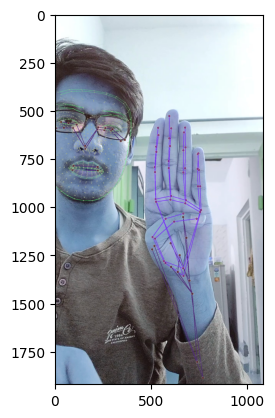